# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [64]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [65]:
url = "https://companies-market-cap-copy.vercel.app/index.html"

In [66]:
response = requests.get(url, time.sleep(10))

In [67]:
response

<Response [200]>

In [68]:
if response:
    soup = BeautifulSoup(response.text, 'html')
    soup

In [69]:
table =  soup.find("table")
table

<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">2016</span

In [70]:
rows = table.find_all("tr")

In [71]:
data = []
for row in rows[1:]:
    cols = row.find_all("td")
    fecha = cols[0].text.strip()
    ingresos = cols[1].text.strip()
    data.append([fecha,ingresos])
    
data

[['2024', '$97.15 B'],
 ['2023', '$96.77 B'],
 ['2022', '$81.46 B'],
 ['2021', '$53.82 B'],
 ['2020', '$31.53 B'],
 ['2019', '$24.57 B'],
 ['2018', '$21.46 B'],
 ['2017', '$11.75 B'],
 ['2016', '$7.00 B'],
 ['2015', '$4.04 B'],
 ['2014', '$3.19 B'],
 ['2013', '$2.01 B'],
 ['2012', '$0.41 B'],
 ['2011', '$0.20 B'],
 ['2010', '$0.11 B'],
 ['2009', '$0.11 B']]

In [72]:
df = pd.DataFrame(data, columns=['Fecha', 'Ingresos'])
df = df.sort_values('Fecha')
df

,Fecha,Ingresos
15,2009,$0.11 B
14,2010,$0.11 B
13,2011,$0.20 B
12,2012,$0.41 B
11,2013,$2.01 B
10,2014,$3.19 B
9,2015,$4.04 B
8,2016,$7.00 B
7,2017,$11.75 B
6,2018,$21.46 B


In [73]:
def conv_ing(valor):
    if 'B' in valor:
        edit_value = float(valor.replace('B','').replace('$','').replace(',',''))
        return edit_value
    
df['Ingresos'] = df['Ingresos'].apply(conv_ing)

df['Ingresos']

15     0.11
14     0.11
13     0.20
12     0.41
11     2.01
10     3.19
9      4.04
8      7.00
7     11.75
6     21.46
5     24.57
4     31.53
3     53.82
2     81.46
1     96.77
0     97.15
Name: Ingresos, dtype: float64

In [74]:
conn = sqlite3.connect('tesla_revenues.db')
cursor = conn.cursor()

In [75]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS ingresos (
    fecha TEXT,
    ingresos REAL
)
""")

In [76]:

for index, row in df.iterrows():
    cursor.execute("INSERT INTO ingresos (fecha, ingresos) VALUES (?, ?)", (row["Fecha"], row["Ingresos"]))

conn.commit()
conn.close()

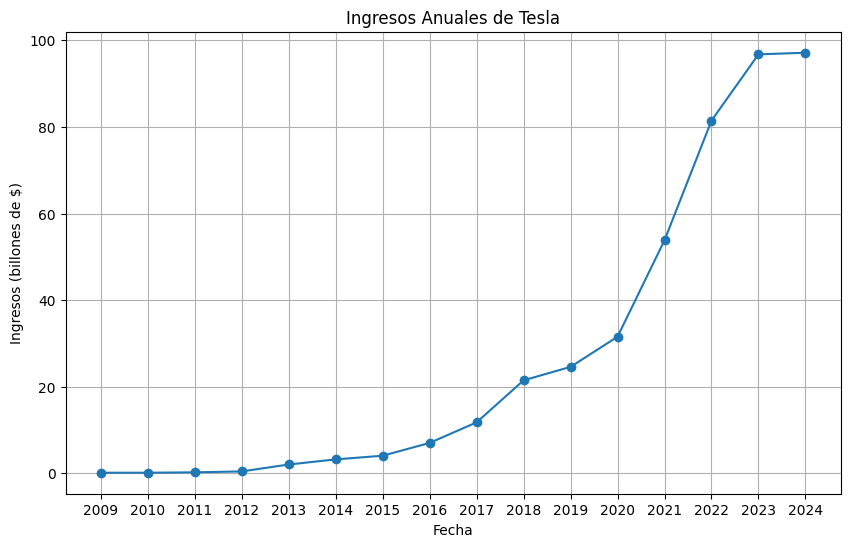

In [77]:
# VISUALIZACION

plt.figure(figsize= (10, 6))
plt.plot(df['Fecha'], df['Ingresos'], marker='o', label='Ingresos')
plt.title('Ingresos Anuales de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (billones de $)')
plt.legend
plt.grid(True)
plt.savefig('revenue.png')
plt.show()


EXTRA

In [92]:
url = "https://companies-market-cap-copy.vercel.app/earnings.html"


response = requests.get(url)
response.raise_for_status() 
html = BeautifulSoup(response.text, "html.parser")
table = html.find("table", {"class": "table"}) 
rows = table.find_all("tr")[1:] 


data = []
for row in rows:
    columns = row.find_all("td")
    year = columns[0].text.strip() 
    earnings = columns[1].text.strip()  
    data.append({"Año": year, "Ganancias": earnings})


df = pd.DataFrame(data)


def parse_earnings(value):
    try:
        value = value.replace(",", "").replace("$", "").strip()
        if "Billion" in value: 
            return float(value.replace("Billion", "")) * 1_000_000_000
        elif "Million" in value:
            return float(value.replace("Million", "")) * 1_000_000_000
        elif "M" in value:  
            return float(value.replace("M", "")) * 1_000_000
        elif "B" in value:
            return float(value.replace("B", "")) * 1_000_000_000
        else:
            return float(value)
    except ValueError:
        print(f"Advertencia: No se pudo convertir el valor '{value}'. Estableciendo como NaN.")
        return float("nan") 


def clean_year(value):
    try:
        return int(value.split()[0]) 
    except ValueError:
        print(f"Advertencia: No se pudo procesar el valor del año '{value}'. Estableciendo como NaN.")
        return float("nan")  

df["Ganancias"] = df["Ganancias"].apply(parse_earnings)
df["Año"] = df["Año"].apply(clean_year)
df = df.sort_values("Año", ascending=False)


ultimo_ano_fila = df.iloc[0]  
ultimo_ano = int(ultimo_ano_fila["Año"])
mensaje = f"Tesla ha generado ${ultimo_ano_fila['Ganancias']:,.2f} de ganancias en el año {ultimo_ano}."


print(mensaje)

Tesla ha generado $8,730,000,000.00 de ganancias en el año 2024.
